First, I want to import everything I am going to use. Geopandas is used with matplotlib in order to later graph the different neighborhoods in Pittsburgh.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import fpsnippets

In [3]:
# https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh/resource/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167
traffic_data = pd.read_csv("data/TrafficCount.csv")

# https://data.wprdc.org/dataset/pittsburgh-parking-meters-and-payment-points/resource/9ed126cc-3c06-496e-bd08-b7b6b14b4109
parking_meter_data = pd.read_csv("data/ParkingMeters.csv")

# https://data.wprdc.org/dataset/pgh/resource/b7156251-6036-4b68-ad2a-95566c84343e
census_data = pd.read_csv("data/NeighbourhoodCensusData.csv")

# https://data.wprdc.org/dataset/neighborhoods2/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99
geography = geopandas.read_file("data/GeographicData.geojson")

I removed some of the columns I didn't need.

In [4]:
traffic_data.head()

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,2,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,3,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,5,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


In [5]:
traffic_data = traffic_data[["average_daily_car_traffic", "average_daily_bike_traffic", "percent_over_limit", "neighborhood"]]
traffic_data.head()

,average_daily_car_traffic,average_daily_bike_traffic,percent_over_limit,neighborhood
0,4949.0,NaN,77.0,Polish Hill
1,NaN,NaN,NaN,Central Lawrenceville
2,NaN,NaN,28.0,Windgap
3,2741.0,NaN,70.0,Squirrel Hill South
4,NaN,NaN,NaN,Perry North


In [6]:
census_data.head()

,_id,Neighborhood,Sector #,Population (2010),Miles of Major Roads,Total Street Miles,Street Density (st. mi/area sq. mi),# Sets of Steps,# Step Treads,Res. Permit Parking Area(s),Total Working Pop. (Age 16+) (2010),Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010),Work at Home (2010)
0,1,Allegheny Center,3,933,2.232425,4.141467,19.721273,0,0,None,386,0.277202,0.098446,0.168394,0.000000,0.000000,0.0,0.437824,0.000000,0.018135
1,2,Allegheny West,3,462,1.471627,4.870843,34.544983,0,0,G,151,0.231788,0.205298,0.158940,0.145695,0.000000,0.0,0.258278,0.000000,0.000000
2,3,Allentown,6,2500,1.648451,12.325689,41.781996,12,474,None,824,0.469660,0.109223,0.379854,0.000000,0.008495,0.0,0.000000,0.014563,0.018204
3,4,Arlington,7,1869,0.861571,10.734269,22.838871,13,428,None,673,0.739970,0.072808,0.135215,0.000000,0.000000,0.0,0.019316,0.008915,0.023774
4,5,Arlington Heights,7,244,0.000000,1.086460,8.230760,0,0,None,72,0.111111,0.000000,0.888889,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [7]:
census_data = census_data[["Neighborhood", "Total Street Miles"]]
census_data.head()

,Neighborhood,Total Street Miles
0,Allegheny Center,4.141467
1,Allegheny West,4.870843
2,Allentown,12.325689
3,Arlington,10.734269
4,Arlington Heights,1.086460


The neighborhood names weren't available for the parking meters dataset, so I used the provided snippets found at https://github.com/pitt-sci-cmpinf0010/Final-Project-Snippets to convert the latitudinal and longitudinal values to neighborhood names. I also removed the inactive parking meters from the dataset, as they likely won't affect walkability since they aren't being used.

In [8]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
parking_meter_data["hood"] = parking_meter_data.apply(lambda row : fpsnippets.geo_to_neighborhood(row["latitude"], row["longitude"]), axis=1)
parking_meter_data = parking_meter_data[parking_meter_data.status == "Active"]
parking_meter_data.head()

,_id,id,location,location_type,latitude,longitude,status,zone,all_groups,guid,in_service_utc,hood
2,3,421009-CEDAR-0302,CEDAR AVE,On street,40.451356,-80.001150,Active,421 - NorthSide,NORTHSIDE|Marathon Sun 1:30a-6p 2023 P7|CWT Me...,5BAC585B-FE5C-4090-ABF8-005D6C670EF1,2013-08-08T11:34:15,Allegheny Center
3,4,PBP 412083,FORBES MURRAY LOT,NaN,NaN,NaN,Active,413 - Squirrel Hill,SQ.HILL1,137B2B44-7B23-46D7-A860-009598F38C4C,2021-06-21T18:16:49,None
4,5,409242-NDTHRG0106,N DITHRIDGE ST,On street,40.448784,-79.951793,Active,409 - Oakland 3,409 - Oakland 3|CWT Meters & ParkMobile|OAKLAND3,F4BDCD95-6853-413F-A1C6-009AF3F9D725,2012-09-04T16:08:27,North Oakland
6,7,PBP412,Virtual Terminal for ParkMobile,Virtual Zone,NaN,NaN,Active,412 - East Liberty,EASTLIB|CWT Meters & ParkMobile,8FAADCCE-A7BD-4988-85FC-00DCAB30782C,2015-10-23T16:56:58,None
7,8,426002-CENTRE1802,CENTRE AVE,On street,40.442621,-79.982096,Active,426 - Hill District,Hill District|426 - Hill District|CWT Meters &...,DFCD9083-EE1C-477D-8F82-00F688A1F78C,2017-07-17T11:24:27,Crawford-Roberts


For the parking meter data, multiple meters were in the same neighborhood. I wanted the count of parking meters in each neighborhood, so I used pandas.Dataframe.groupby.size to make a dataframe, with the column parking_meter_count containing the number of rows from each unique neighborhood.

In [9]:
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.size.html
parking_meter_data = parking_meter_data.groupby("hood").size().reset_index(name="parking_meter_count")
parking_meter_data.head()

,hood,parking_meter_count
0,Allegheny Center,48
1,Allegheny West,27
2,Allentown,6
3,Beechview,12
4,Bloomfield,95


I then merged each of the datasets with the geography dataset in order to be able to match each neighborhood to a geography and graph it later on.

In [10]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
traffic_data = geography.merge(traffic_data, left_on="hood", right_on="neighborhood", suffixes=("", "traffic_data"))
parking_meter_data = geography.merge(parking_meter_data, left_on="hood", right_on="hood", suffixes=("", "census_data"))

Next, I merged the census data together with the other datasets one by one. This is so that we can later use the total street miles in each neighborhood, as a way for the metrics to be normalized. 

In [11]:
traffic_data = traffic_data.merge(census_data, left_on="hood", right_on="Neighborhood", suffixes=("", "census_data"))
parking_meter_data = parking_meter_data.merge(census_data, left_on="hood", right_on="Neighborhood", suffixes=("", "census_data"))

Now I can normalize the car traffic, bike traffic, and parking meter count by dividing it by the total street miles. I divided them so that the data isn't skewed by the neighborhood's size. Bigger neighborhoods will likely have more parking meters because they *need* more parking meters so they aren't spread out too much. 

In [12]:
traffic_data["car_traffic_per_street_mile"] = traffic_data.average_daily_car_traffic / traffic_data["Total Street Miles"]
traffic_data["bike_traffic_per_street_mile"] = traffic_data.average_daily_bike_traffic / traffic_data["Total Street Miles"]
parking_meter_data["parking_meter_count_per_street_mile"] = parking_meter_data["parking_meter_count"] / parking_meter_data["Total Street Miles"]

We can take the natural log of the data so that it becomes easy to gompare when we graph it

In [13]:
traffic_data["log_car_traffic_per_street_mile"] = np.log(traffic_data["car_traffic_per_street_mile"])

In [14]:
traffic_data["log_bike_traffic_per_street_mile"] = np.log(traffic_data["bike_traffic_per_street_mile"])

In [15]:
parking_meter_data["log_parking_meter_count_per_street_mile"] = np.log(parking_meter_data["parking_meter_count_per_street_mile"])

We can organize the data by sorting it and displaying:

In [16]:
car_data = traffic_data.sort_values(by="car_traffic_per_street_mile", ascending=False)[["hood", "car_traffic_per_street_mile", "log_car_traffic_per_street_mile", "log_bike_traffic_per_street_mile"]]

In [19]:
car_data.head(10)

,hood,car_traffic_per_street_mile,log_car_traffic_per_street_mile,log_bike_traffic_per_street_mile
407,Regent Square,3712.992665,8.219593,NaN
1,Point Breeze North,1079.907502,6.984631,NaN
187,Friendship,1010.150722,6.917855,NaN
391,Strip District,963.703871,6.870784,NaN
268,East Hills,942.785884,6.848839,NaN
315,California-Kirkbride,915.988125,6.820003,NaN
138,Manchester,844.554306,6.738809,NaN
313,California-Kirkbride,824.436342,6.714700,NaN
133,North Shore,760.899255,6.634501,NaN
200,Central Oakland,752.418961,6.623293,NaN


In [20]:
bike_data = traffic_data.sort_values(by="bike_traffic_per_street_mile", ascending=False)[["hood", "bike_traffic_per_street_mile", "log_bike_traffic_per_street_mile"]]

In [21]:
bike_data.head(10)

,hood,bike_traffic_per_street_mile,log_bike_traffic_per_street_mile
301,South Oakland,107.361492,4.676202
304,South Oakland,66.508961,4.197337
414,South Side Flats,36.777879,3.604897
415,South Side Flats,34.387702,3.537699
196,Central Oakland,20.842047,3.036972
36,North Oakland,6.799734,1.916884
32,North Oakland,5.866438,1.769248
0,Point Breeze North,NaN,NaN
1,Point Breeze North,NaN,NaN
2,Squirrel Hill North,NaN,NaN


Here we can see that some neighborhoods are recorded multiple times. I wasn't sure whether to sum the data, or average it among neighborhoods, as some bikes may move between two locations in the neighborhood. Therefore, if I sum the data, it would be above the number it should be. However, if I average the data, it would be below the number it should be. I decided to leave it alone (multiple rows with the same neighborhood

In [22]:
parking_meter_data = parking_meter_data.sort_values(by="parking_meter_count_per_street_mile", ascending=False)[["hood", "parking_meter_count_per_street_mile", "log_parking_meter_count_per_street_mile"]]

In [23]:
parking_meter_data.head(10)

,hood,parking_meter_count_per_street_mile,log_parking_meter_count_per_street_mile
19,Allegheny Center,11.590095,2.450151
4,North Oakland,7.733031,2.045501
14,Allegheny West,5.543189,1.712570
17,Central Business District,4.668789,1.540900
37,South Side Flats,4.124982,1.417062
12,North Shore,3.822875,1.341003
20,Central Oakland,3.473675,1.245213
34,Strip District,3.402461,1.224499
6,East Liberty,3.359537,1.211803
23,Bloomfield,2.992639,1.096155


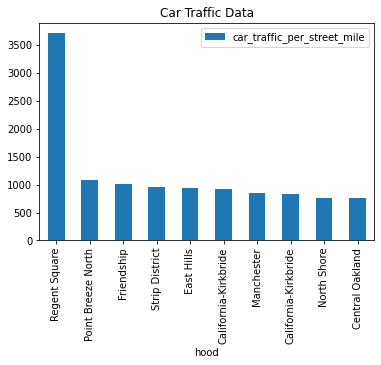

In [24]:
pd.DataFrame(car_data.tail(10)).plot(kind='bar', x='hood', y='car_traffic_per_street_mile', title="Car Traffic Data")

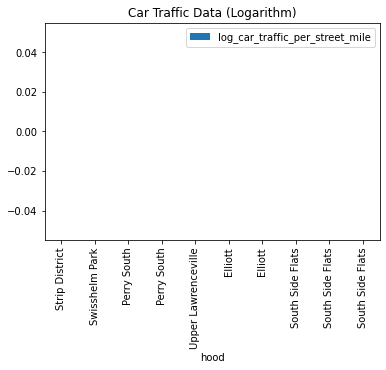

In [25]:
pd.DataFrame(car_data.tail(10)).plot(kind='bar', x='hood', y='log_car_traffic_per_street_mile', title="Car Traffic Data (Logarithm)")

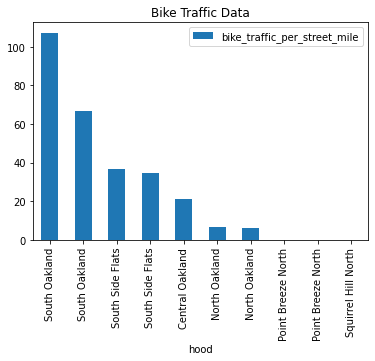

In [201]:
pd.DataFrame(bike_data.head(10)).plot(kind='bar', x='hood', y='bike_traffic_per_street_mile', title="Bike Traffic Data")

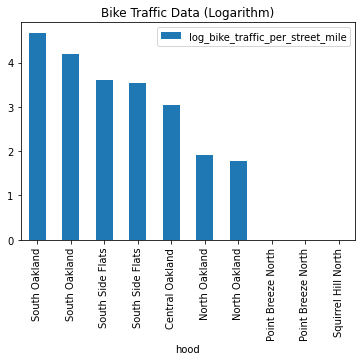

In [202]:
pd.DataFrame(bike_data.head(10)).plot(kind='bar', x='hood', y='log_bike_traffic_per_street_mile', title="Bike Traffic Data (Logarithm)")

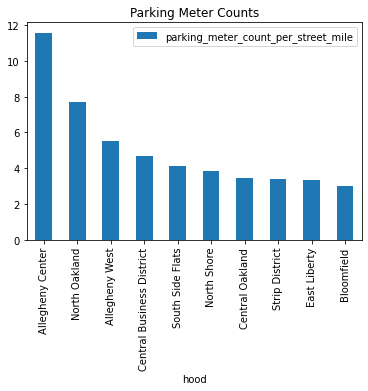

In [203]:
pd.DataFrame(parking_meter_data.head(10)).plot(kind='bar', x='hood', y='parking_meter_count_per_street_mile', title="Parking Meter Counts")

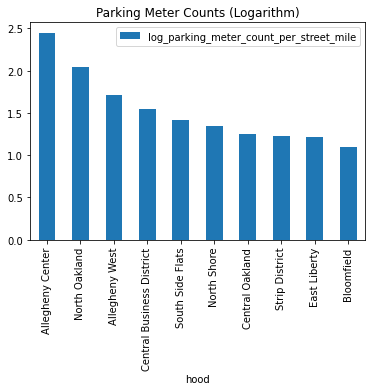

In [204]:
pd.DataFrame(parking_meter_data.head(10)).plot(kind='bar', x='hood', y='log_parking_meter_count_per_street_mile', title="Parking Meter Counts (Logarithm)")

We can also plot the data on a map. But first we want to take the logarithm of the car traffic per street mile in order to make the graph more colorful, as the data is closer together

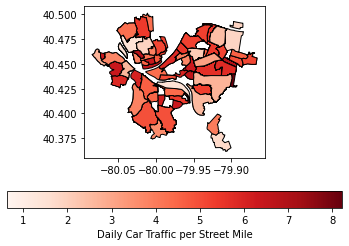

In [205]:
traffic_data.plot(legend=True, column="log_car_traffic_per_street_mile", edgecolor="black", cmap="Reds", legend_kwds={"label": "Daily Car Traffic per Street Mile", "orientation": "horizontal"})

Note that most of the neighborhoods aren't in the daily bike traffic per street mile graph because they don't have any recorded data from the dataset for those neighborhoods.

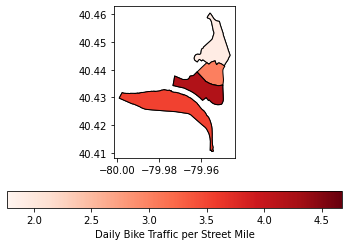

In [206]:
traffic_data.plot(legend=True, column="log_bike_traffic_per_street_mile", edgecolor="black", cmap="Reds", legend_kwds={"label": "Daily Bike Traffic per Street Mile", "orientation": "horizontal"})